In [2]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [1]:
# NOTES
# Gaussian Mixture incomplete

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [4]:
df = pd.read_csv("Desktop/carnivore-spotter-export3.csv")

In [5]:
df = df.drop(['ID','Vocalization','Vocalization Description', 'Carnivore Response',
       'Number of Young Species', 'Number of Adult Species','Eating','Time Seen', 'Behavior','Time Submitted',
       'Reaction Description','Species', 'On Leash', 'Number of Adults',
       'Number of Children','Confidence','Uploaded Media', 'Dog Size',
       'General Comments','Neighborhood','Animal Features',
       'Conflict Description','Reaction', 'Conflict','Number of Dogs'],axis = 1)

In [6]:
df = df[(df['Latitude']>minLat)&(df['Latitude']<maxLat)&(df['Longitude']>minLon)&(df['Longitude']<maxLon)]

In [7]:
df.fillna(method='bfill',inplace=True)

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [36]:
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange', 'red', 'lime', 'mediumorchid', 'darkolivegreen'])

In [37]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [38]:
# Number of samples per component
n_samples = 500

In [39]:
# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

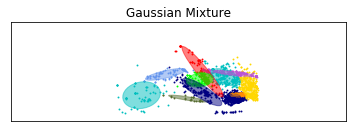

In [40]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=11, covariance_type='full').fit(df_scaled)
plot_results(df_scaled, gmm.predict(df_scaled), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

In [4]:
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=y_pred,cmap='Paired')

NameError: name 'df_scaled' is not defined

ImportError: cannot import name 'GMM' from 'sklearn.mixture' (/Users/ethanchatfield/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/__init__.py)